In [1]:
## Machine Learning Online Class
#  Exercise 8 | Anomaly Detection and Collaborative Filtering
#
#  Instructions
#  ------------
#
#  This file contains code that helps you get started on the
#  exercise. You will need to complete the following functions:
#
#     estimateGaussian.m
#     selectThreshold.m
#     cofiCostFunc.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#
from matplotlib import use, cm
use('Agg')
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.optimize import minimize


Loading movie ratings dataset.
Average rating for movie 1 (Toy Story): 3.878319 / 5


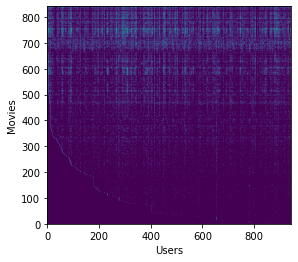

In [2]:
%matplotlib inline
## =============== Part 1: Loading movie ratings dataset ================
#  You will start by loading the movie ratings dataset to understand the
#  structure of the data.
#
from cofiCostFunc import cofiCostFunc
from checkCostFunction import checkCostFunction
from loadMovieList import loadMovieList
from normalizeRatings import normalizeRatings

print( 'Loading movie ratings dataset.')

#  Load data
data = scipy.io.loadmat('ex8_movies.mat')
Y = data['Y']
R = data['R'].astype(bool)
#  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies on 
#  943 users
#
#  R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a
#  rating to movie i

#  From the matrix, we can compute statistics like average rating.
print ('Average rating for movie 1 (Toy Story): %f / 5' % np.mean(Y[0, R[0, :]]))

#  We can "visualize" the ratings matrix by plotting it with imagesc

plt.figure()
plt.imshow(Y, aspect='equal', origin='upper', extent=(0, Y.shape[1], 0, Y.shape[0]/2.0))
plt.ylabel('Movies')
plt.xlabel('Users')
plt.show()


In [3]:
## ============ Part 2: Collaborative Filtering Cost Function ===========
#  You will now implement the cost function for collaborative filtering.
#  To help you debug your cost function, we have included set of weights
#  that we trained on that. Specifically, you should complete the code in 
#  cofiCostFunc.m to return J.

#  Load pre-trained weights (X, Theta, num_users, num_movies, num_features)
data = scipy.io.loadmat('ex8_movieParams.mat')
X = data['X']
Theta = data['Theta']
num_users = data['num_users']
num_movies = data['num_movies']
num_features = data['num_features']

#  Reduce the data set size so that this runs faster
num_users = 4
num_movies = 5
num_features = 3
X = X[:num_movies, :num_features]
Theta = Theta[:num_users, :num_features]
Y = Y[:num_movies, :num_users]
R = R[:num_movies, :num_users]

#  Evaluate cost function
J, grad = cofiCostFunc(np.hstack((X.T.flatten(), Theta.T.flatten())), Y, R, num_users, num_movies,
               num_features, 0)
           
print ('Cost at loaded parameters: %f \n(this value should be about 22.22)' % J)


Cost at loaded parameters: 22.224604 
(this value should be about 22.22)


In [4]:
## ============== Part 3: Collaborative Filtering Gradient ==============
#  Once your cost function matches up with ours, you should now implement 
#  the collaborative filtering gradient function. Specifically, you should 
#  complete the code in cofiCostFunc.m to return the grad argument.
#  
print ('Checking Gradients (without regularization) ...')

#  Check gradients by running checkNNGradients
checkCostFunction()



Checking Gradients (without regularization) ...
[[ 0.0436121   0.0436121 ]
 [-0.38400212 -0.38400212]
 [-1.08347666 -1.08347666]
 [-0.10693703 -0.10693703]
 [-0.54560524 -0.54560524]
 [-0.58287597 -0.58287597]
 [-1.55852113 -1.55852113]
 [-0.17908769 -0.17908769]
 [ 0.07161729  0.07161729]
 [-0.11614879 -0.11614879]
 [-0.35071236 -0.35071236]
 [-0.02881932 -0.02881932]
 [ 0.32984021  0.32984021]
 [-1.23099209 -1.23099209]
 [-0.30997599 -0.30997599]
 [ 0.          0.        ]
 [-0.6461049  -0.6461049 ]
 [ 0.35621771  0.35621771]
 [-1.59914512 -1.59914512]
 [-0.33873436 -0.33873436]
 [ 0.          0.        ]
 [-0.92865369 -0.92865369]
 [ 0.46242155  0.46242155]
 [-1.10526033 -1.10526033]
 [-0.41020137 -0.41020137]
 [ 0.          0.        ]
 [-0.44006701 -0.44006701]]
The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)


If your backpropagation implementation is correct, then
 the relative difference will be small (less than 1e

In [6]:
## ========= Part 4: Collaborative Filtering Cost Regularization ========
#  Now, you should implement regularization for the cost function for 
#  collaborative filtering. You can implement it by adding the cost of
#  regularization to the original cost computation.
#  

#  Evaluate cost function
J, grad = cofiCostFunc(np.hstack((X.T.flatten(), Theta.T.flatten())), Y, R, num_users, num_movies,
               num_features, 1.5)
           
print ('Cost at loaded parameters (lambda = 1.5): %f \n(this value should be about 31.34)\n' % J)

Cost at loaded parameters (lambda = 1.5): 31.344056 
(this value should be about 31.34)



In [7]:
## ======= Part 5: Collaborative Filtering Gradient Regularization ======
#  Once your cost matches up with ours, you should proceed to implement 
#  regularization for the gradient. 
#

#  
print ('Checking Gradients (with regularization) ...')

#  Check gradients by running checkNNGradients
checkCostFunction(1.5)


Checking Gradients (with regularization) ...
[[ 0.1337125   0.1337125 ]
 [ 0.78308093  0.78308093]
 [-0.14717069 -0.14717069]
 [ 0.30472517  0.30472517]
 [ 1.33213925  1.33213925]
 [ 1.25623504  1.25623504]
 [-0.19192215 -0.19192215]
 [ 0.28492726  0.28492726]
 [ 0.75225859  0.75225859]
 [ 0.56756929  0.56756929]
 [ 0.16513728  0.16513728]
 [ 0.0440372   0.0440372 ]
 [-0.0990677  -0.0990677 ]
 [ 0.51540664  0.51540664]
 [-0.19363962 -0.19363962]
 [ 0.15894982  0.15894982]
 [ 0.47464005  0.47464005]
 [ 0.54842498  0.54842498]
 [ 1.22515411  1.22515411]
 [-1.02038642 -1.02038642]
 [ 1.02500042  1.02500042]
 [-0.05183538 -0.05183538]
 [-0.18207827 -0.18207827]
 [ 1.57328267  1.57328267]
 [-0.44727242 -0.44727242]
 [ 0.88064405  0.88064405]
 [-0.32544548 -0.32544548]]
The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)


If your backpropagation implementation is correct, then
 the relative difference will be small (less than 1e-9)

In [8]:
## ============== Part 6: Entering ratings for a new user ===============
#  Before we will train the collaborative filtering model, we will first
#  add ratings that correspond to a new user that we just observed. This
#  part of the code will also allow you to put in your own ratings for the
#  movies in our dataset!
#
movieList = loadMovieList()

#  Initialize my ratings
my_ratings = np.zeros(1682)

# Check the file movie_idx.txt for id of each movie in our dataset
# For example, Toy Story (1995) has ID 1, so to rate it "4", you can set
my_ratings[0] = 4

# Or suppose did not enjoy Silence of the Lambs (1991), you can set
my_ratings[97] = 2

# We have selected a few movies we liked / did not like and the ratings we
# gave are as follows:
my_ratings[6] = 3
my_ratings[11] = 5
my_ratings[53] = 4
my_ratings[63] = 5
my_ratings[65] = 3
my_ratings[68] = 5
my_ratings[182] = 4
my_ratings[225] = 5
my_ratings[354] = 5

print ('New user ratings:')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print ('Rated %d for %s\n' % (my_ratings[i], movieList[i]))


New user ratings:
Rated 4 for Toy Story (1995)

Rated 3 for Twelve Monkeys (1995)

Rated 5 for Usual Suspects, The (1995)

Rated 4 for Outbreak (1995)

Rated 5 for Shawshank Redemption, The (1994)

Rated 3 for While You Were Sleeping (1995)

Rated 5 for Forrest Gump (1994)

Rated 2 for Silence of the Lambs, The (1991)

Rated 4 for Alien (1979)

Rated 5 for Die Hard 2 (1990)

Rated 5 for Sphere (1998)



In [9]:
## ================== Part 7: Learning Movie Ratings ====================
#  Now, you will train the collaborative filtering model on a movie rating 
#  dataset of 1682 movies and 943 users
#

print ('\nTraining collaborative filtering...')

#  Load data
data = scipy.io.loadmat('ex8_movies.mat')
Y = data['Y']
R = data['R'].astype(bool)

#  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies by 
#  943 users
#
#  R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a
#  rating to movie i

#  Add our own ratings to the data matrix
Y = np.column_stack((my_ratings, Y))
R = np.column_stack((my_ratings, R)).astype(bool)

#  Normalize Ratings
Ynorm, Ymean = normalizeRatings(Y, R)

#  Useful Values
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10

# Set Initial Parameters (Theta, X)
X = np.random.rand(num_movies, num_features)
Theta = np.random.rand(num_users, num_features)

initial_parameters = np.hstack((X.T.flatten(), Theta.T.flatten()))
# Set Regularization
Lambda = 10

costFunc = lambda p: cofiCostFunc(p, Ynorm, R, num_users, num_movies, num_features, Lambda)[0]
gradFunc = lambda p: cofiCostFunc(p, Ynorm, R, num_users, num_movies, num_features, Lambda)[1]

result = minimize(costFunc, initial_parameters, method='CG', jac=gradFunc, options={'disp': True, 'maxiter': 1000.0})
theta = result.x
cost = result.fun


# Unfold the returned theta back into U and W
X = theta[:num_movies*num_features].reshape(num_movies, num_features)
Theta = theta[num_movies*num_features:].reshape(num_users, num_features)

print ('Recommender system learning completed.')


Training collaborative filtering...
Optimization terminated successfully.
         Current function value: 35118.790099
         Iterations: 282
         Function evaluations: 433
         Gradient evaluations: 433
Recommender system learning completed.


In [10]:
## ================== Part 8: Recommendation for you ====================
#  After training the model, you can now make recommendations by computing
#  the predictions matrix.
#

p = X.dot(Theta.T)
my_predictions = p[:, 0] + Ymean

movieList = loadMovieList()

# sort predictions descending
pre=np.array([[idx, p] for idx, p in enumerate(my_predictions)])
post = pre[pre[:,1].argsort()[::-1]]
r = post[:,1]
ix = post[:,0]

print ('\nTop recommendations for you:')
for i in range(10):
    j = int(ix[i])
    print ('Predicting rating %.1f for movie %s\n' % (my_predictions[j], movieList[j]))

print ('\nOriginal ratings provided:')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print ('Rated %d for %s\n' % (my_ratings[i], movieList[i]))



Top recommendations for you:
Predicting rating 5.0 for movie Shawshank Redemption, The (1994)

Predicting rating 5.0 for movie Great Day in Harlem, A (1994)

Predicting rating 4.9 for movie Graduate, The (1967)

Predicting rating 4.9 for movie Hoop Dreams (1994)

Predicting rating 4.8 for movie Whole Wide World, The (1996)

Predicting rating 4.8 for movie One Flew Over the Cuckoo's Nest (1975)

Predicting rating 4.7 for movie Close Shave, A (1995)

Predicting rating 4.6 for movie Enchanted April (1991)

Predicting rating 4.6 for movie Wrong Trousers, The (1993)

Predicting rating 4.6 for movie Clerks (1994)


Original ratings provided:
Rated 4 for Toy Story (1995)

Rated 3 for Twelve Monkeys (1995)

Rated 5 for Usual Suspects, The (1995)

Rated 4 for Outbreak (1995)

Rated 5 for Shawshank Redemption, The (1994)

Rated 3 for While You Were Sleeping (1995)

Rated 5 for Forrest Gump (1994)

Rated 2 for Silence of the Lambs, The (1991)

Rated 4 for Alien (1979)

Rated 5 for Die Hard 2 (19